In [ ]:
#imports 
import pandas as pd
import numpy as np
import datetime
import geopy.distance
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import skew
from scipy import stats
from scipy.stats import boxcox
import matplotlib.pyplot as plt
!pip install diptest
!pip install boruta
import diptest
from sklearn.utils.validation import column_or_1d
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from collections import OrderedDict
import csv
import imblearn
from imblearn.over_sampling import SMOTE,SMOTENC




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 119 kB 23.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 4.3 MB/s 


In [ ]:
df = pd.read_csv('fraudTest.csv')
print(df.head())
#df.describe()

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 

In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df_new = df[['trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num',
       'merch_lat', 'merch_long', 'is_fraud']]

df_new.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
for cols in df_new.columns:
  print(cols,' ',df_new[cols].isna().sum())

trans_date_trans_time   0
cc_num   0
merchant   0
category   0
amt   0
gender   0
street   0
city   0
state   0
zip   0
lat   0
long   0
city_pop   0
job   0
dob   0
trans_num   0
merch_lat   0
merch_long   0
is_fraud   0


In [ ]:
#remove that one row with Nan
df_new = df_new.dropna()

In [ ]:
df_new.describe()

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,38.542798,-90.231380,0.003860
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.095829,13.733071,0.062008
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,19.027422,-166.671575,0.000000
25%,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,34.755302,-96.905129,0.000000
50%,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,39.376593,-87.445204,0.000000
75%,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,41.954163,-80.264637,0.000000
max,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,66.679297,-66.952026,1.000000


In [ ]:
#df_new[df_new['merch_long'].isna()]

In [ ]:
jobs = df_new['category']
jobs.value_counts()

gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449
Name: category, dtype: int64

In [ ]:
# function to calculate age
def calculate_age(dob):
    year_now = datetime.datetime.now().year
    dob_year = int(dob[:4])
    age = year_now - dob_year
    age_list.append(age)

In [ ]:
# function call
age_list = []
for date in df_new['dob']:
  calculate_age(date)

In [ ]:
# adding Age to the dataframe
df_new['Age'] = age_list

df_new['Age'].describe()

count    555719.000000
mean         48.636237
std          17.418528
min          17.000000
25%          35.000000
50%          47.000000
75%          60.000000
max          98.000000
Name: Age, dtype: float64

In [ ]:
df_new.columns
df_numeric_x = df_new[['cc_num','amt','zip','lat','long','city_pop','merch_lat','merch_long','Age']]
df_numeric_y = np.array(df_new['is_fraud'])

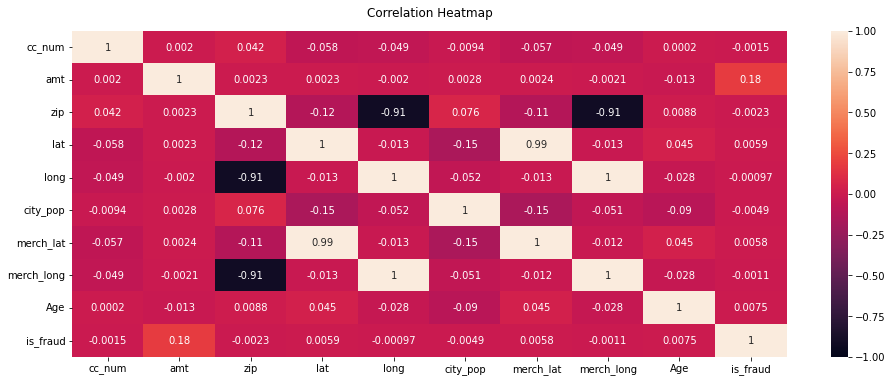

In [ ]:
df_numeric = df_new[['cc_num','amt','zip','lat','long','city_pop','merch_lat','merch_long','Age','is_fraud']]
df_numeric.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_numeric.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=14);

In [ ]:
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(df_numeric_x, list(df_new['is_fraud']))


RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1)

In [ ]:
#list(df_new['is_fraud'])

In [ ]:
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(df_numeric_x, list(df_new['is_fraud']))

feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feat_selector.fit(df_numeric_x.values, df_new['is_fraud'].values)

# check selected features
feat_selector.support_

# check ranking of features
feat_selector.ranking_

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	9
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	9
Tentative: 	0
Rejected: 	0


array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(df_numeric_x.values)

In [ ]:
transaction_time = df_new['trans_date_trans_time']
transaction_time.value_counts()
transaction_time[0][14:16]

transaction_category = []
for transaction in df_new['trans_date_trans_time']:
  if int(transaction[14:16]) < 12:
    transaction_category.append('Forenoon Transaction')
  else:
    transaction_category.append('Afternoon Transaction')


df_new['Transaction Category'] = transaction_category
df_new['Transaction Category'].value_counts()


Afternoon Transaction    444412
Forenoon Transaction     111307
Name: Transaction Category, dtype: int64

In [ ]:
distance = []
for i in range(len(df_new)):
  lat1 = df_new['lat'][i]
  lon1 = df_new['long'][i]
  lat2 = df_new['merch_lat'][i]
  lon2 = df_new['merch_long'][i]
  coords_1 = (lat1,lon1)
  coords_2 = (lat2,lon2)
  dist = geopy.distance.geodesic(coords_1, coords_2).miles
  distance.append(dist)

In [ ]:
df_new['distance'] = distance
df_new['distance'].describe()

In [ ]:
df_new.columns

In [ ]:
df_hist = df_new[['amt', 'city_pop', 'is_fraud', 'Age', 'distance']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56b0e9fc10>,
      dtype=object)

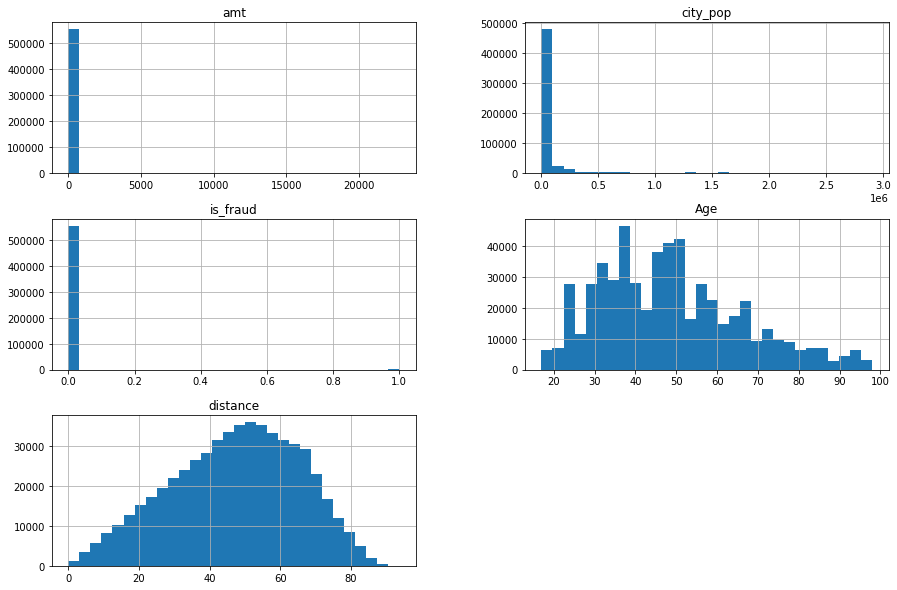

In [ ]:
df_hist.hist(bins=30, figsize=(15, 10))

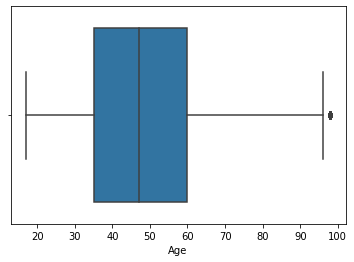

In [ ]:
ax = sns.boxplot(x="Age", data=df_new) 

In [ ]:
q75,q25 = np.percentile(df_new['Age'],[75,25])
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

Age_cleaned = []
for x in df_new['Age']:
  if x >= max:
    Age_cleaned.append(np.nan)
  elif x <= min:
    Age_cleaned.append(np.nan)
  else:
    Age_cleaned.append(x)

df_new['Age'] = Age_cleaned
print(df_new['Age'].isnull().sum())
df_new = df_new.dropna(axis = 0)

199


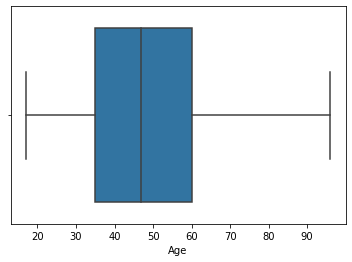

In [ ]:
ax = sns.boxplot(x="Age", data=df_new) 

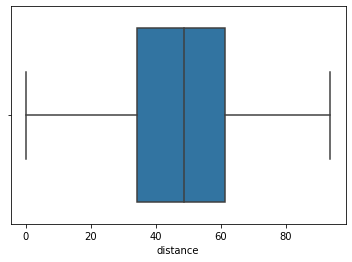

In [ ]:
ax = sns.boxplot(x="distance", data=df_new) 

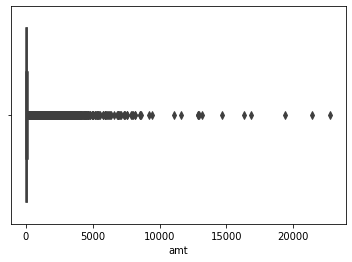

In [ ]:
ax = sns.boxplot(x="amt", data=df_new) 

In [ ]:
#q75,q25 = np.percentile(df_new['amt'],[75,25])
#intr_qr = q75-q25
#max = q75+(1.5*intr_qr)
#min = q25-(1.5*intr_qr)

#amt_cleaned = []
#for x in df_new['amt']:
#  if x >= max:
#    amt_cleaned.append(np.nan)
#  elif x <= min:
#    amt_cleaned.append(np.nan)
#  else:
#   amt_cleaned.append(x)

#df_new['Amt_cleaned'] = amt_cleaned
#print(df_new['Amt_cleaned'].isnull().sum())
#df_new = df_new.dropna(axis = 0)

In [ ]:
#ax = sns.boxplot(x="amt", data=df_new) 

In [ ]:
#ax = sns.boxplot(x="city_pop", data=df_new) 

In [ ]:
#q75,q25 = np.percentile(df_new['city_pop'],[75,25])
#intr_qr = q75-q25
#max = q75+(1.5*intr_qr)
#min = q25-(1.5*intr_qr)

#city_pop_cleaned = []
#for x in df_new['city_pop']:
#  if x >= max:
#    city_pop_cleaned.append(np.nan)
#  elif x <= min:
#    city_pop_cleaned.append(np.nan)
#  else:
#    city_pop_cleaned.append(x)


#df_new['City_pop_cleaned'] = city_pop_cleaned
#print(df_new['City_pop_cleaned'].isnull().sum())
#df_new = df_new.dropna(axis = 0)

In [ ]:
#ax = sns.boxplot(x="city_pop", data=df_new) 

In [ ]:
print('After removing outliers: ',len(df_new))

After removing outliers:  555520


In [ ]:
df_new = df_new[['merchant', 'category', 'amt',
       'gender', 'city', 'state','city_pop',
       'job','is_fraud', 'Age','Transaction Category', 'distance']]

In [ ]:
#checking skewness
df_new.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


amt         37.151935
city_pop     5.582345
is_fraud    16.026131
Age          0.605311
distance    -0.236542
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


lambda: 0.1360505629894499


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


lambda: -0.11050656260937311


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


amt         -0.016182
city_pop     0.057736
is_fraud    16.026131
Age          0.605311
distance    -0.236542
dtype: float64

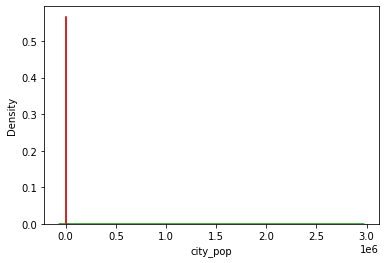

In [ ]:
amt=df_new['amt']
sns.distplot(amt, hist=False, kde=True)
transformed_amt_data, best_lambda = boxcox(amt)
sns.distplot(transformed_amt_data, hist=False, kde=True) 
print('lambda:', best_lambda)
amt[0:5]
df_new['amt']=transformed_amt_data
transformed_amt_data[0:5]

city_pop=df_new['city_pop']
sns.distplot(city_pop, hist=False, kde=True)
transformed_pop_data, best_lambda = boxcox(city_pop)
sns.distplot(transformed_pop_data, hist=False, kde=True) 
print('lambda:', best_lambda)
amt[0:5]
df_new['city_pop']=transformed_pop_data
transformed_pop_data[0:5]

df_new.skew()

In [ ]:
df_new.columns

In [ ]:
q66,q33 = np.percentile(df_new['Age'],[66,33])
age_category = []
for age in df_new['Age']:
  if age >= q66:
    age_category.append('old')
  elif age <= q33:
    age_category.append('middle aged')
  elif age > q33 and age < q66:
    age_category.append('young')

df_new['Age Category'] = age_category
df_new['Age Category'].value_counts()

In [ ]:
q66,q33 = np.percentile(df_new['distance'],[66,33])
distance_category = []
for distance in df_new['distance']:
  if distance >= q66:
    distance_category.append('far away distance')
  elif distance <= q33:
    distance_category.append('nearby distance')
  elif distance > q33 and distance < q66:
    distance_category.append('moderate distance')

df_new['Distance Category'] = distance_category
df_new['Distance Category'].value_counts()

far away distance    188877
nearby distance      183322
moderate distance    183321
Name: Distance Category, dtype: int64

In [ ]:
q66,q33 = np.percentile(df_new['city_pop'],[66,33])
city_pop_category = []
for city_pop in df_new['city_pop']:
  if city_pop >= q66:
    city_pop_category.append('Highly Populated')
  elif city_pop <= q33:
    city_pop_category.append('Sparsely Populated ')
  elif city_pop > q33 and city_pop < q66:
    city_pop_category.append('Moderately Polulated')

df_new['Population Category'] = city_pop_category
df_new['Population Category'].value_counts()

Highly Populated        189106
Sparsely Populated      183531
Moderately Polulated    182883
Name: Population Category, dtype: int64

In [ ]:
q66,q33 = np.percentile(df_new['amt'],[66,33])
amt_category = []
for amt in df_new['amt']:
  if amt >= q66:
    amt_category.append('Highly Expensive')
  elif amt <= q33:
    amt_category.append('Sparsely Expensive ')
  elif amt > q33 and amt < q66:
    amt_category.append('Moderately Expensive')

df_new['Amt Category'] = amt_category
df_new['Amt Category'].value_counts()

Highly Expensive        188904
Sparsely Expensive      183329
Moderately Expensive    183287
Name: Amt Category, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


amt         -0.016182
city_pop     0.057736
is_fraud    16.026131
Age          0.605311
distance    -0.236542
dtype: float64

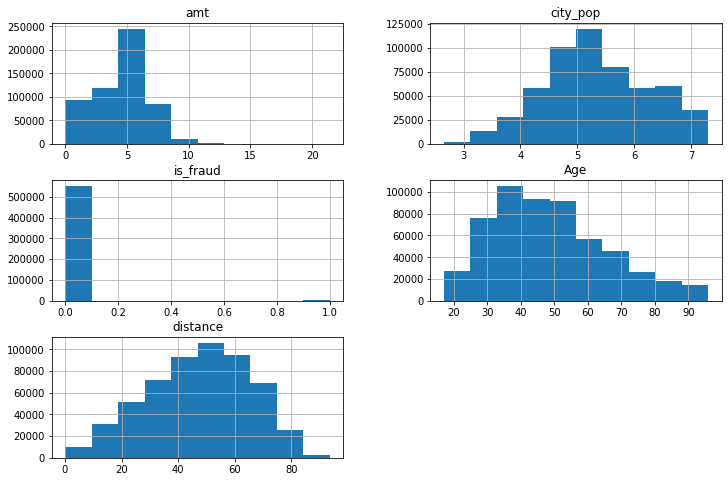

In [ ]:
df_new.hist(bins=10, figsize=(12, 8))
df_new.skew()

In [ ]:
category = df_new['category']
#category = category.replace({"misc_pos":"misc","misc_net":"misc","grocery_pos":"grocery","grocery_net":"grocery","shopping_pos":"shopping","shopping_net":"shopping"})

category = category.replace({"misc_pos":"misc","misc_net":"misc","grocery_pos":"grocery","grocery_net":"grocery"})
df_new['category'] = category
Fraud = df_new['is_fraud']
Fraud = Fraud.replace({0:"Not a fraud",1:"Fraud"})
df_new['is_fraud'] = Fraud


In [ ]:
job = []
for j in df_new['job']:
  job.append(j.split(',')[0])
df_new['job'] = job 


In [ ]:
df_new.head()

,merchant,category,amt,gender,city,state,city_pop,job,is_fraud,Age,Transaction Category,distance,Age Category,Distance Category,Population Category,Amt Category
0,fraud_Kirlin and Sons,personal_care,1.129648,M,Columbia,SC,6.829640,Mechanical engineer,Not a fraud,54.0,Afternoon Transaction,15.294273,old,nearby distance,Highly Populated,Sparsely Expensive
1,fraud_Sporer-Keebler,personal_care,4.316460,F,Altonah,UT,4.234695,Sales professional,Not a fraud,32.0,Afternoon Transaction,65.140855,middle aged,far away distance,Sparsely Populated,Moderately Expensive
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,4.843111,F,Bellmore,NY,6.197176,Librarian,Not a fraud,52.0,Afternoon Transaction,36.788154,young,nearby distance,Highly Populated,Moderately Expensive
3,fraud_Haley Group,misc,5.480994,M,Titusville,FL,6.339204,Set designer,Not a fraud,35.0,Afternoon Transaction,17.159238,middle aged,nearby distance,Highly Populated,Moderately Expensive
4,fraud_Johnston-Casper,travel,1.256571,M,Falmouth,MI,4.886327,Furniture designer,Not a fraud,67.0,Afternoon Transaction,64.885553,old,far away distance,Sparsely Populated,Sparsely Expensive


In [ ]:
df_cat = df_new[['merchant', 'category','gender', 'city', 'state',
       'job','is_fraud','Transaction Category', 'Age Category','Distance Category',
       'Population Category', 'Amt Category' ]]
df_cat.head()

,merchant,category,gender,city,state,job,is_fraud,Transaction Category,Age Category,Distance Category,Population Category,Amt Category
0,fraud_Kirlin and Sons,personal_care,M,Columbia,SC,Mechanical engineer,Not a fraud,Afternoon Transaction,old,nearby distance,Highly Populated,Sparsely Expensive
1,fraud_Sporer-Keebler,personal_care,F,Altonah,UT,Sales professional,Not a fraud,Afternoon Transaction,middle aged,far away distance,Sparsely Populated,Moderately Expensive
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,F,Bellmore,NY,Librarian,Not a fraud,Afternoon Transaction,young,nearby distance,Highly Populated,Moderately Expensive
3,fraud_Haley Group,misc,M,Titusville,FL,Set designer,Not a fraud,Afternoon Transaction,middle aged,nearby distance,Highly Populated,Moderately Expensive
4,fraud_Johnston-Casper,travel,M,Falmouth,MI,Furniture designer,Not a fraud,Afternoon Transaction,old,far away distance,Sparsely Populated,Sparsely Expensive


In [ ]:
merc = []
for m in df_cat['merchant']:
  merc.append(m.split(' ')[0])
df_cat['merchant'] = merc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_cat.drop('merchant', axis=1, inplace=True)
df_cat.drop('city', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_cat.head()

,category,gender,state,job,is_fraud,Transaction Category,Age Category,Distance Category,Population Category,Amt Category
0,personal_care,M,SC,Mechanical engineer,Not a fraud,Afternoon Transaction,old,nearby distance,Highly Populated,Sparsely Expensive
1,personal_care,F,UT,Sales professional,Not a fraud,Afternoon Transaction,middle aged,far away distance,Sparsely Populated,Moderately Expensive
2,health_fitness,F,NY,Librarian,Not a fraud,Afternoon Transaction,young,nearby distance,Highly Populated,Moderately Expensive
3,misc,M,FL,Set designer,Not a fraud,Afternoon Transaction,middle aged,nearby distance,Highly Populated,Moderately Expensive
4,travel,M,MI,Furniture designer,Not a fraud,Afternoon Transaction,old,far away distance,Sparsely Populated,Sparsely Expensive


In [ ]:
df_cat_fraud = df_cat[df_cat['is_fraud'] == 'Fraud']
len(df_cat_fraud)

2138

In [ ]:
#sample 50k datapoints stratified
df_sample = df_cat.sample(n = 2000)
df_sample = df_sample.append(df_cat_fraud)

In [ ]:
df_sample.columns

Index(['category', 'gender', 'state', 'job', 'is_fraud',
       'Transaction Category', 'Age Category', 'Distance Category',
       'Population Category', 'Amt Category'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from mlxtend.preprocessing import TransactionEncoder
#!pip install mlxtend.frequent_patterns.fpgrowth
#from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from mlxtend.preprocessing import TransactionEncoder
ohenc = OneHotEncoder()
ohenc.fit(df_sample)
#ohenc.fit(df_cat)
df_ohenc = ohenc.transform(df_sample)
#df_ohenc = ohenc.transform(df_cat)

In [ ]:
df_ohenc

<4138x437 sparse matrix of type '<class 'numpy.float64'>'
	with 41380 stored elements in Compressed Sparse Row format>

In [ ]:
ohenc.get_feature_names()
df_ohenc.columns = ohenc.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_final = pd.DataFrame(df_ohenc.toarray())

In [ ]:
df_final.columns = ohenc.get_feature_names()


In [ ]:
df_final

,x0_entertainment,x0_food_dining,x0_gas_transport,x0_grocery,x0_health_fitness,x0_home,x0_kids_pets,x0_misc,x0_personal_care,x0_shopping_net,...,x6_young,x7_far away distance,x7_moderate distance,x7_nearby distance,x8_Highly Populated,x8_Moderately Polulated,x8_Sparsely Populated,x9_Highly Expensive,x9_Moderately Expensive,x9_Sparsely Expensive
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4136,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# importing the required module
from mlxtend.frequent_patterns import apriori, association_rules


# Extracting the most frequest itemsets via Mlxtend.
# The length column has been added to increase ease of filtering.
frequent_itemsets = apriori(df_final, min_support=0.005, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# printing the frequent itemset
frequent_itemsets

,support,itemsets,length
0,0.053649,(x0_entertainment),1
1,0.044708,(x0_food_dining),1
2,0.093282,(x0_gas_transport),1
3,0.182455,(x0_grocery),1
4,0.043741,(x0_health_fitness),1
...,...,...,...
14584,0.008458,"(x6_old, x4_Fraud, x9_Highly Expensive, x5_Aft...",7
14585,0.005317,"(x8_Moderately Polulated, x7_far away distance...",7
14586,0.006525,"(x8_Moderately Polulated, x7_moderate distance...",7
14587,0.005317,"(x6_young, x4_Fraud, x8_Highly Populated, x9_H...",7


In [ ]:
for i in range(len(frequent_itemsets)):
  if 'x4_Fraud' in frequent_itemsets['itemsets'][i]:
    if frequent_itemsets['length'][i] > 6:
      print(frequent_itemsets['itemsets'][i],frequent_itemsets['length'][i])

frozenset({'x6_middle aged', 'x4_Fraud', 'x8_Highly Populated', 'x9_Highly Expensive', 'x5_Afternoon Transaction', 'x0_grocery', 'x1_F'}) 7
frozenset({'x6_old', 'x7_far away distance', 'x4_Fraud', 'x9_Highly Expensive', 'x5_Afternoon Transaction', 'x0_grocery', 'x1_F'}) 7
frozenset({'x6_old', 'x7_moderate distance', 'x4_Fraud', 'x9_Highly Expensive', 'x5_Afternoon Transaction', 'x0_grocery', 'x1_F'}) 7
frozenset({'x6_old', 'x4_Fraud', 'x9_Highly Expensive', 'x5_Afternoon Transaction', 'x0_grocery', 'x7_nearby distance', 'x1_F'}) 7
frozenset({'x6_old', 'x4_Fraud', 'x8_Highly Populated', 'x9_Highly Expensive', 'x5_Afternoon Transaction', 'x0_grocery', 'x1_F'}) 7
frozenset({'x8_Moderately Polulated', 'x6_old', 'x4_Fraud', 'x9_Highly Expensive', 'x5_Afternoon Transaction', 'x0_grocery', 'x1_F'}) 7
frozenset({'x6_old', 'x4_Fraud', 'x9_Highly Expensive', 'x5_Afternoon Transaction', 'x0_grocery', 'x1_F', 'x8_Sparsely Populated '}) 7
frozenset({'x7_far away distance', 'x4_Fraud', 'x8_Highly Po

In [ ]:
frequent_itemsets = apriori(df_final, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.053649,(x0_entertainment)
1,0.044708,(x0_food_dining)
2,0.093282,(x0_gas_transport)
3,0.182455,(x0_grocery)
4,0.043741,(x0_health_fitness)
...,...,...
5911,0.011116,"(x6_old, x7_far away distance, x4_Fraud, x8_Hi..."
5912,0.011600,"(x8_Moderately Polulated, x6_old, x7_far away ..."
5913,0.010633,"(x6_old, x4_Fraud, x8_Highly Populated, x9_Hig..."
5914,0.010391,"(x8_Moderately Polulated, x7_moderate distance..."


In [ ]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.005)
rules.to_csv('out.csv', index=False)